# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [1]:
# Import necessary libraries

import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv')

In [5]:
from statsmodels.tsa.stattools import adfuller

In [3]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
type(df)

pandas.core.frame.DataFrame

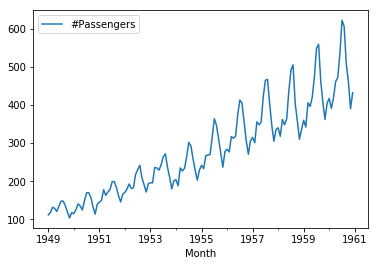

In [4]:
df.plot()

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [10]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(ts, values, window):
    rollmean = ts.rolling(window = window, center = False).mean()
    rollstd = ts.rolling(window = window, center = False).std()
    
    fig = plt.figure(figsize = (12,8))
    plt.plot(ts, label = 'data', color = 'black')
    plt.plot(rollmean, label = 'Rolling Mean', color = 'red')
    plt.plot(rollstd, label = 'Rolling std', color = 'blue')
    plt.legend()
    plt.show()
    
    dftest = adfuller(ts[values])
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

Use your newly created function on the airpassenger data set.

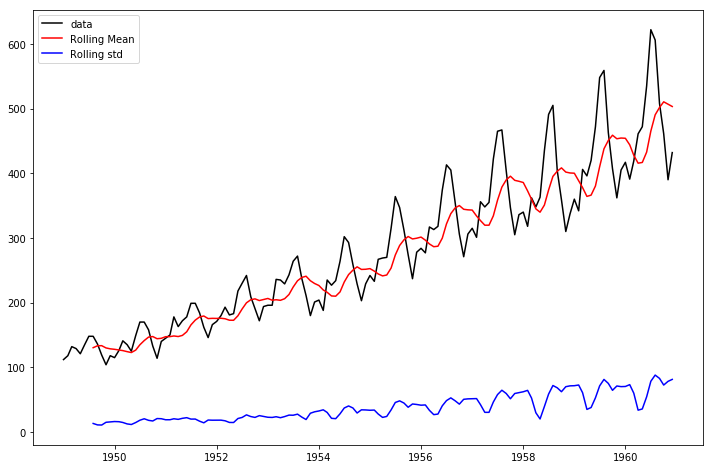

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [11]:
stationarity_check(df, '#Passengers', 8)

## Perform a log() and sqrt() transform

In [15]:
# Log transform timeseries and compare with original to check the effect
logged = np.log(df)

In [16]:
sqrted = np.sqrt(df)

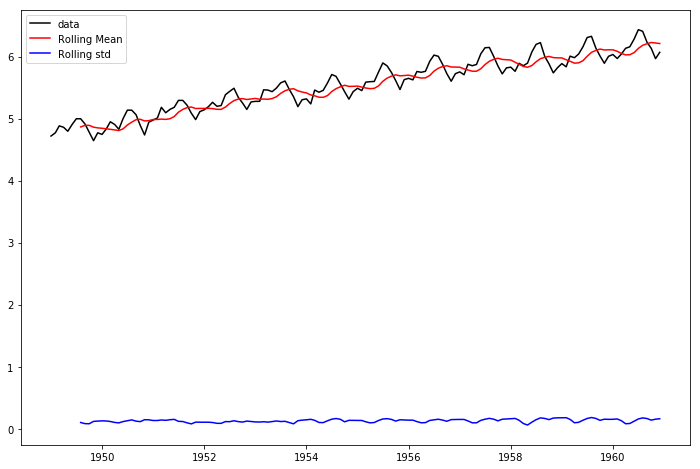

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [17]:
stationarity_check(logged, '#Passengers', 8)

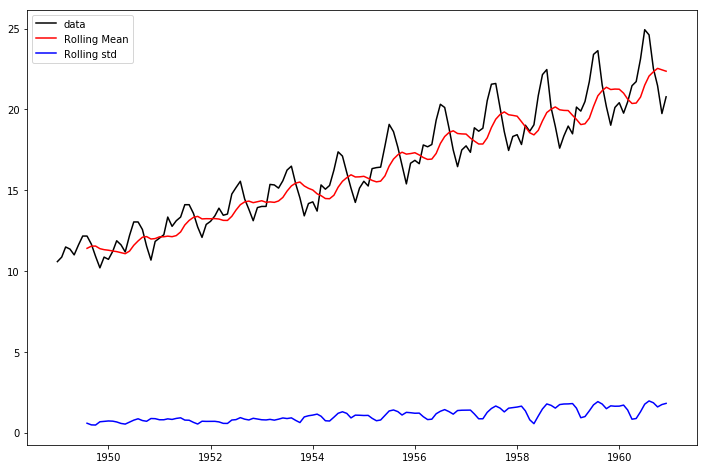

Test Statistic                  -0.345854
p-value                          0.918754
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [18]:
stationarity_check(sqrted, '#Passengers', 8)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

In [19]:
# your code here
logged_rol = logged - logged.rolling(7).mean()
logged_rol

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [20]:
# Subtract the moving average from the original data and check head for Nans
logged_rol.dropna(inplace=True)

In [7]:
# Drop the NaN values from timeseries calculated above


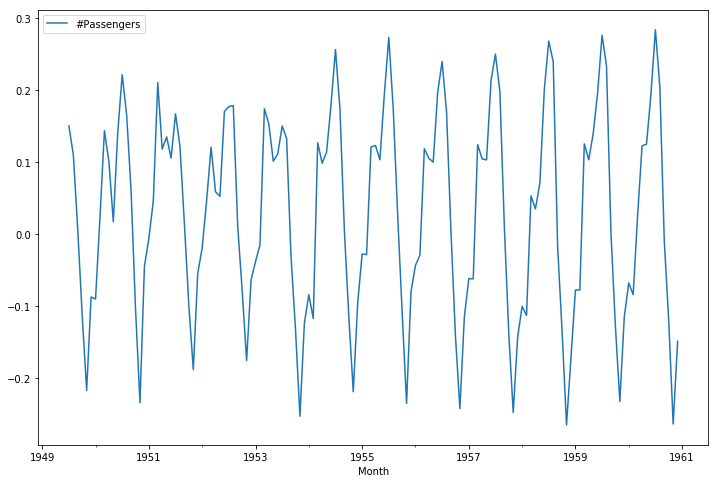

In [22]:
# Plot the result
logged_rol.plot(figsize = (12,8))

Finally, use your function `check_stationarity` to see if this series is considered stationary!

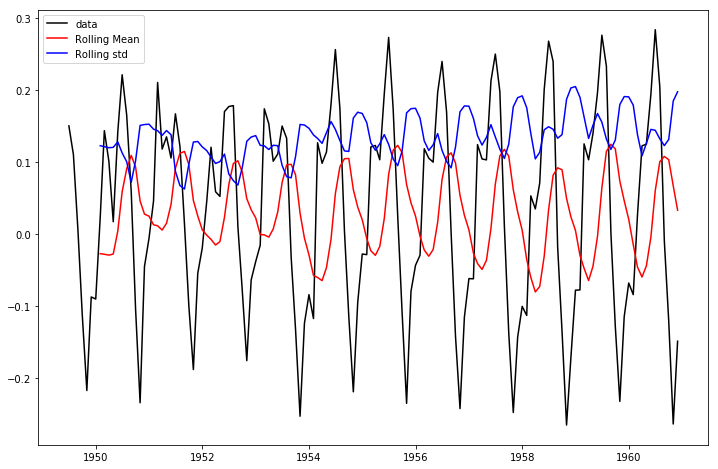

Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [24]:
stationarity_check(logged_rol, '#Passengers', 8)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


I still don't know how to interpret the Dickey-Fuller test. 

Seasonality has not been removed. Mean and std still oscillate but without trending upwards.

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

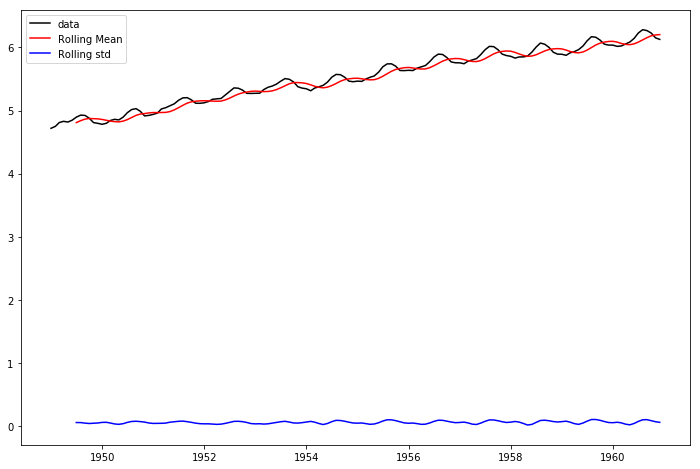

Test Statistic                  -2.018742
p-value                          0.278416
#Lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [29]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log

exp_rolmean = logged.ewm(halflife = 2).mean()





# Plot the original data with exp weighted average
stationarity_check(exp_rolmean, '#Passengers', 7)

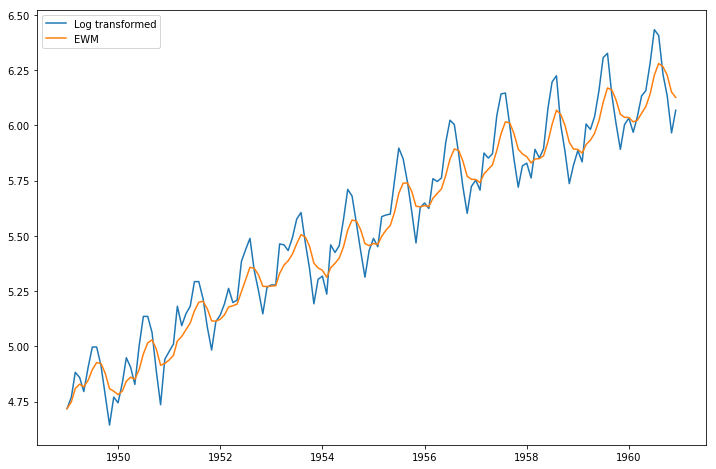

In [31]:
fig = plt.figure(figsize = (12,8))
plt.plot(logged, label = 'Log transformed')
plt.plot(exp_rolmean, label = "EWM")
plt.legend()
plt.show()

In [32]:
# Subtract the moving average from the original data and plot
log_exp = logged - exp_rolmean


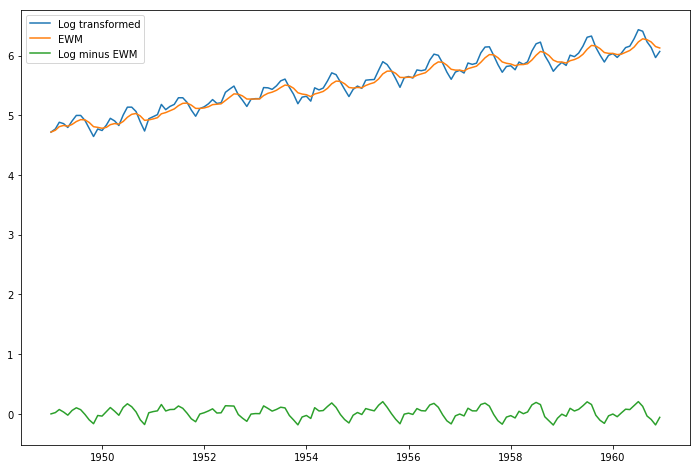

In [33]:
# do a stationarity check
fig = plt.figure(figsize = (12,8))
plt.plot(logged, label = 'Log transformed')
plt.plot(exp_rolmean, label = "EWM")
plt.plot(log_exp, label = 'Log minus EWM')
plt.legend()
plt.show()

In [ ]:
#Wow! It's all flattened out now. Cool.

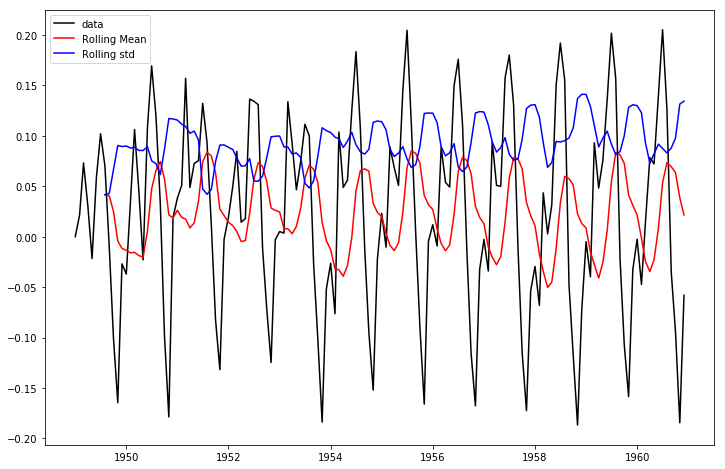

Test Statistic                  -3.087696
p-value                          0.027477
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [34]:
stationarity_check(log_exp, '#Passengers', 8)

In [35]:
#results from logged_rol
#Test Statistic                  -2.348027
#p-value                          0.156946
#Lags Used                      14.000000
#Number of Observations Used    123.000000
#Critical Value (1%)             -3.484667
#Critical Value (5%)             -2.885340
#Critical Value (10%)            -2.579463
#dtype: float64

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


Similar to the results with logged_rol.


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [41]:
# difference your data and look at the head
#log_exp
log_exp_dif = log_exp.diff(periods = 12)
#Why 12 periods???

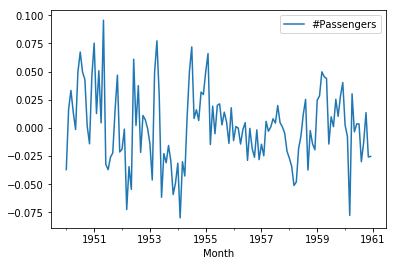

In [42]:
# plot your differenced time series
log_exp_dif.plot()

In [43]:
# drop nas
log_exp_dif.dropna(inplace = True)

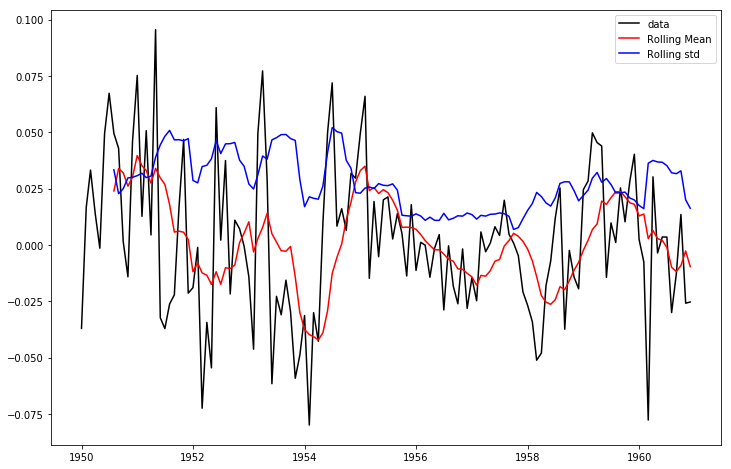

Test Statistic                  -4.158133
p-value                          0.000775
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [44]:
# perform the stationarity check
stationarity_check(log_exp_dif, '#Passengers', 8)

### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.